In [15]:
import sympy as sp
import matplotlib.pyplot as plt

## Pendulum equation

d2θ/dt2 + L/gsin(θ)=0

In [17]:
t, L, g = sp.symbols('t L g')
theta = sp.Function('theta')(t)


In [18]:
eqn = sp.Eq(theta.diff(t,2)+L/g*sp.sin(theta),0)

In [19]:
eqn

Eq(L*sin(theta(t))/g + Derivative(theta(t), (t, 2)), 0)

In [20]:
bcs = {
    theta.subs(t,0):sp.pi/4,
    theta.diff(t,1).subs(t,0):0
}

In [38]:
sol = sp.dsolve(eqn, ics=bcs)
sol

KeyboardInterrupt: 

## deflection

EI*d4y/dx4 = w

In [29]:
E,I,x = sp.symbols('E I x')
y = sp.Function('y')(x)

w = sp.Function('w')(x)

# linearly increaing load
# w = x

# constant load
w = 10

In [30]:
eq = sp.Eq(E*I*y.diff(x,4),w)

In [75]:
eq

Eq(E*I*Derivative(y(x), (x, 4)), x)

In [76]:
sol = sp.dsolve(eq,y)

In [77]:
sol

Eq(y(x), C1 + C2*x + C3*x**2 + C4*x**3 + x**5/(120*E*I))

In [78]:
L = sp.symbols('L')

bcs = {
    y.subs(x,0):0,
    y.subs(x,L):0,
    y.subs(x,L/2):50,
    y.diff(x,1).subs(x,L/2):0,
}

In [79]:
exact_sol = sp.dsolve(eq, ics=bcs)

In [80]:
exact_sol

Eq(y(x), -11*L**2*x**3/(480*E*I) + x**5/(120*E*I) + x*(48000*E*I - L**5)/(240*E*I*L) + x**2*(-32000*E*I + 3*L**5)/(160*E*I*L**2))

In [81]:
y_prime = exact_sol.rhs.diff(x,1)
y_prime

-11*L**2*x**2/(160*E*I) + x**4/(24*E*I) + (48000*E*I - L**5)/(240*E*I*L) + x*(-32000*E*I + 3*L**5)/(80*E*I*L**2)

In [82]:
max_deflection = sp.solve(y_prime)

In [83]:
max_deflection

[{E: L**2*(2*L**3 - 14*L**2*x + 5*L*x**2 + 10*x**3)/(96000*I)}, {L: 2*x}]

In [84]:
import numpy as np


xs = np.linspace(0,100,100)
ys = []

exact_sol = exact_sol.subs(L, 1)
exact_sol = exact_sol.subs(E, 100)
exact_sol = exact_sol.subs(I, 10)

for point in xs:
    deflect = exact_sol.subs(x,point)
    ys.append(deflect.rhs)

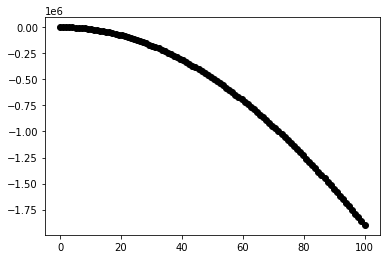

In [88]:
plt.plot(xs,ys,'--ok')